In [1]:
using  GridapGmsh
using  Gridap
using  Gridap.Geometry
using  Gridap.TensorValues
using  PyPlot
using  LinearAlgebra
using  Gmsh: gmsh

In [2]:
const  E_mat = 70e3
const  ν_mat = 0.3
const  G_mat = E_mat/(2*(1+ν_mat))
const  Gc = 4.096
const  ls = 1
const  η = 1e-15
const  λ = E_mat*ν_mat/((1+ν_mat)*(1-2*ν_mat))
const  μ = E_mat/(2*(1+ν_mat))
const  k = λ + μ

67307.69230769231

In [3]:

const L = 120
const H = 100
const CP = H/2
const CL = 20 
const CH = H/300
const hfc = ls/30
const hf = ls/5
const h = 50*hf 
const FMR = 10
 
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h, 1)  
gmsh.model.geo.addPoint(L, 0.0, 0.0, h, 2) 
gmsh.model.geo.addPoint(L, H, 0.0, h, 3) 
gmsh.model.geo.addPoint(0.0, H, 0.0, h, 4)
gmsh.model.geo.addPoint(0.0, CP + CH, 0.0, h, 5)
gmsh.model.geo.addPoint(CL, CP, 0.0, hfc, 6)
gmsh.model.geo.addPoint(0.0, CP - CH, 0.0, h, 7)

gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 7, 6)
gmsh.model.geo.addLine(7, 1, 7)
gmsh.model.geo.addCurveLoop([1,2,3,4,5,6,7],1) 

gmsh.model.geo.addPoint(CL + 14, CP+3, 0.0, h, 10)
gmsh.model.geo.addPoint(CL + 20, CP+3, 0.0, h, 11)
gmsh.model.geo.addPoint(CL + 26, CP+3, 0.0, h, 12)
gmsh.model.geo.addCircleArc(10,11,12, 9)
gmsh.model.geo.addCircleArc(12,11,10, 10)
gmsh.model.geo.addCurveLoop([9,10],2) 

gmsh.model.geo.addPlaneSurface([1,-2], 3)
gmsh.model.geo.addPlaneSurface([2], 4)

gmsh.model.addPhysicalGroup(2, [3],6)
gmsh.model.addPhysicalGroup(2, [4],7)
gmsh.model.addPhysicalGroup(1, [1],8)
gmsh.model.addPhysicalGroup(1, [3],9)
gmsh.model.addPhysicalGroup(0, [2],10)
gmsh.model.setPhysicalName(2, 6, "NCL")
gmsh.model.setPhysicalName(2, 7, "CL")
gmsh.model.setPhysicalName(1, 8, "DirichletBot")
gmsh.model.setPhysicalName(1, 9, "DirichletTop")
gmsh.model.setPhysicalName(0, 10, "DirichletPoint")

gmsh.model.mesh.field.add("Box", 11)
gmsh.model.mesh.field.setNumber(11, "VIn", hf)
gmsh.model.mesh.field.setNumber(11, "VOut", h)
gmsh.model.mesh.field.setNumber(11, "XMin", 0.95*CL)
gmsh.model.mesh.field.setNumber(11, "XMax", L)
gmsh.model.mesh.field.setNumber(11, "YMin", CP-FMR)
gmsh.model.mesh.field.setNumber(11, "YMax", CP+FMR)
gmsh.model.mesh.field.setAsBackgroundMesh(11)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("SquarePlateWithEdgeNotch.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 60%] Meshing curve 6 (Line)
Info    : [ 70%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 9 (Circle)
Info    : [ 90%] Meshing curve 10 (Circle)
Info    : Done meshing 1D (Wall 0.0067071s, CPU 0.006711s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 1.81538s, CPU 1.79079s)
Info    : 49599 nodes 99394 elements
Info    : Writing 'SquarePlateWithEdgeNotch.msh'...
Info    : Done writing 'SquarePlateWithEdgeNotch.msh'


In [4]:
model = GmshDiscreteModel("SquarePlateWithEdgeNotch.msh")
writevtk(model ,"SquarePlateWithEdgeNotch")

Info    : Reading 'SquarePlateWithEdgeNotch.msh'...
Info    : 21 entities
Info    : 49598 nodes
Info    : 99033 elements
Info    : Done reading 'SquarePlateWithEdgeNotch.msh'


3-element Vector{Vector{String}}:
 ["SquarePlateWithEdgeNotch_0.vtu"]
 ["SquarePlateWithEdgeNotch_1.vtu"]
 ["SquarePlateWithEdgeNotch_2.vtu"]

In [5]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

99008-element Vector{Int8}:
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 4
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [6]:
NCL_tag = get_tag_from_name(labels,"NCL")

4

In [7]:
CL_tag = get_tag_from_name(labels,"CL")

5

In [4]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, -0.5, 0.0, 0.5, 0.0, -0.5, 0.0, 0.5)

In [9]:
function σfun(ε,s_in)
    σM = (s_in^2 + η)*(λ*tr(ε)*I2 + 2*μ*(ε))
    return σM
end

σfun (generic function with 1 method)

In [10]:
function σElas(ε,s_in,tag)
    ϵElas = ε - ϵRes(tag)
    σM = (s_in^2 + η)*(λ*tr(ϵElas)*I2 + 2*μ*(ϵElas))
    return σM
end

σElas (generic function with 1 method)

In [11]:
function ϵRes(tag)
    if tag == NCL_tag
        return (SymTensorValue(0.0,0.0,0.0))
    elseif tag == CL_tag
        return (SymTensorValue(0.0015,0,0.0015))
    end
end
function σRes(ε,s_in,tag)
    ϵ = ϵRes(tag)
    σRes = (s_in^2 + η)*(λ*tr(ϵ)*I2 + 2*μ*(ϵ))
    return σRes
end

σRes (generic function with 1 method)

In [5]:
(λ*tr(SymTensorValue(0.0015,0,0.0015))*I2 + 2*μ*(SymTensorValue(0.0015,0,0.0015)))

SymTensorValue{2, Float64, 3}(201.9230769230769, 0.0, 201.9230769230769)

In [12]:
function Eigen(ε)
    εArray = get_array(ε)
    Λ, P = eigen(εArray)
    ε1 = Λ[1]
    ε2 = Λ[2]
    if ε1 >= 0 &&  ε2 >= 0
        Λpos = [ε1 0; 0 ε2]
        Λneg = [0 0; 0 0]
    elseif ε1 >= 0 &&  ε2 < 0
        Λpos = [ε1 0; 0 0]
        Λneg = [0 0; 0 ε2]
    elseif ε1 < 0 &&  ε2 >= 0
        Λpos = [0 0; 0 ε2]
        Λneg = [ε1 0; 0 0]
    elseif ε1 < 0 &&  ε2 < 0
        Λpos = [0 0; 0 0]
        Λneg = [ε1 0; 0 ε2]
    end 
   εPos = P*Λpos*P'
   εNeg = P*Λneg*P'
   EpPos = TensorValue(εPos)
   EpNeg = TensorValue(εNeg)    
    return  EpPos, EpNeg
end

Eigen (generic function with 1 method)

In [13]:
function ψPos(ε_in, tag)
    ϵElas = ε_in - ϵRes(tag)
    ϵ_Dev = I4_dev ⊙ ϵElas
    ϵ_Pos, ϵ_Neg = Eigen(ϵ_Dev)
    if tr(ϵElas) >= 0
        ψPlus = 0.5*(k/Gc)*(tr(ϵElas))^2 + (μ/Gc)*(ϵ_Pos ⊙ ϵ_Pos)
    elseif tr(ϵElas) < 0
        ψPlus = (μ/Gc)*(ϵ_Pos ⊙ ϵ_Pos)
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [14]:
ψPos∘(ε(uh), mat_tags)

LoadError: UndefVarError: uh not defined

In [15]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
    ψPlus_in = ψhPos_in
    if ψPlus_in >= ψPlusPrev_in
        ψPlus_out = ψPlus_in
    else
        ψPlus_out = ψPlusPrev_in
    end
    true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [16]:
function  project(q,model ,dΩ,order)
    reffe = ReferenceFE(lagrangian ,Float64 ,order)
    V = FESpace(model ,reffe ,conformity =:L2)
    a(u,v) =∫(u*v)*dΩ
    b(v) =∫(v*q)*dΩ
    op = AffineFEOperator(a,b,V,V)
    qh = solve(op)
    return  qh
end

project (generic function with 1 method)

In [17]:
order = 1
degree = 2*order
Ω= Triangulation(model)
dΩ= Measure(Ω,degree)

Measure()

In [18]:
LoadTagId = get_tag_from_name(labels,"DirichletTop")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 12
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 13711999006564982744

In [19]:
sId = CellState(1.0,dΩ)
shId = project(sId,model,dΩ,order)

SingleFieldFEFunction():
 num_cells: 99008
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 14682607828031830793

In [20]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;conformity=:H1)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 99008
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 14682607828031830793

In [21]:
reffe_Disp = ReferenceFE(lagrangian ,VectorValue{2,Float64},order)
V0_Disp = TestFESpace(model,reffe_Disp;conformity =:H1,
    dirichlet_tags = ["DirichletBot","DirichletTop","DirichletPoint"],
    dirichlet_masks =[(false ,true), (false ,true), (true ,true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 99008
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 14682607828031830793

In [22]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        U_PF = TrialFESpace(V0_PF)
        a_PF(s,ϕ) = ∫(ls*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ + (1/ls)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (1/ls)*ϕ )*dΩ  
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF) 
    
    return sh_out  
end

stepPhaseField (generic function with 1 method)

In [23]:
function  stepDisp(uh_in,sh_in,vApp, tag)
    uApp1(x) = VectorValue(0.0,0.0)
    uApp2(x) = VectorValue(0.0,vApp)
    uApp3(x) = VectorValue(0.0,0.0)
    U_Disp = TrialFESpace(V0_Disp ,[uApp1 ,uApp2,uApp3])
    a_Disp(u,v) =∫( (ε(v)⊙(σfun∘(ε(u),sh_in)) ) )*dΩ
    b_Disp(v) = ∫( (ε(v)⊙(σRes∘(ε(uh_in),sh_in,tag)) ) )*dΩ
    op_Disp = AffineFEOperator(a_Disp ,b_Disp ,U_Disp ,V0_Disp)
    uh_out = solve(op_Disp)
    return  uh_out
end

stepDisp (generic function with 1 method)

In [24]:
cd("Results_e__+0.0015")

In [25]:
uApp = 0
delu = 0.2/70
uAppMax = 0.25
innerMax = 10
count = 0
Load = Float64[]
Displacement = Float64[]

sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)

while uApp .< uAppMax 
        
    if uApp < 0.1
        uApp = uApp .+ delu
    else
        uApp = uApp .+ delu/10
    end
    count = count .+ 1
   
    print("\n Entering displacemtent step$count :", float(uApp))
    
   for inner = 1:innerMax
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        err = abs(sum(∫( ls*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh + (1/ls)*sh*sh)*dΩ-∫( (1/ls)*sh)*dΩ))/abs(sum(∫( (1/ls)*sh)*dΩ))

        print("\n error = ",float(err))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh = stepDisp(uh, sh, uApp, mat_tags)
        
        ψhPos_in = ψPos∘(ε(uh),mat_tags)
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
        
        if err < 1e-8
            break 
        end 
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σElas∘(ε(uh), sh, mat_tags)) ) *dΓ_Load)
    
    push!(Load, Node_Force[2])
    push!(Displacement, uApp)
    if mod(count,20) == 0
         writevtk(Ω,"Results_e*_+0.0015$count",cellfields=
        ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh)])
    end
end


 Entering displacemtent step1 :0.002857142857142857
 error = 1.750952759081378e-17
 Entering displacemtent step2 :0.005714285714285714
 error = 0.00014440860099306651
 error = 2.31897294447249e-5
 error = 2.1547189331817906e-8
 error = 1.3501631586186297e-10
 Entering displacemtent step3 :0.008571428571428572
 error = 1.065932866721268e-12
 Entering displacemtent step4 :0.011428571428571429
 error = 3.870364006458264e-5
 error = 5.5449104656763924e-5
 error = 3.606335443128883e-8
 error = 2.404471030758671e-10
 Entering displacemtent step5 :0.014285714285714285
 error = 1.96926565877881e-12
 Entering displacemtent step6 :0.017142857142857144
 error = 7.249842157010304e-5
 error = 8.969462324047041e-5
 error = 6.180842463256743e-8
 error = 5.384033583717611e-10
 Entering displacemtent step7 :0.02
 error = 5.676737724398903e-12
 Entering displacemtent step8 :0.022857142857142857
 error = 0.00010684303310561963
 error = 0.00012407900088571932
 error = 1.0171111450461159e-7
 error = 1.268

┌ Warning: detected extension '.001520' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step21 :0.06
 error = 5.925310367121442e-10
 Entering displacemtent step22 :0.06285714285714286
 error = 0.00034757223401029404
 error = 0.00036570153802266403
 error = 1.2233750196972097e-6
 error = 1.0283668772270284e-7
 error = 1.1596870150019598e-8
 error = 1.405682420807771e-9
 Entering displacemtent step23 :0.06571428571428573
 error = 1.7376474044294883e-10
 Entering displacemtent step24 :0.06857142857142859
 error = 0.0003815472445327816
 error = 0.0003999782968190304
 error = 1.593339734865807e-6
 error = 1.61051764696673e-7
 error = 2.174694126458519e-8
 error = 3.1501096298827374e-9
 Entering displacemtent step25 :0.07142857142857145
 error = 4.649922434200873e-10
 Entering displacemtent step26 :0.07428571428571432
 error = 0.00041536236491370826
 error = 0.00043415335594185976
 error = 2.046727811277723e-6
 error = 2.4593798892721414e-7
 error = 3.934164136576521e-8
 error = 6.738844265743252e-9
 Entering displacemtent step27 :0.07714285714285718
 e

┌ Warning: detected extension '.001540' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step41 :0.10171428571428584
 error = 2.3089745388930157e-9
 Entering displacemtent step42 :0.10200000000000013
 error = 5.957745877538874e-5
 error = 6.052826855049855e-5
 error = 6.345385602898073e-7
 error = 1.643790146894547e-7
 error = 5.5055957668986625e-8
 error = 1.9517586862887925e-8
 error = 7.0207817757988645e-9
 Entering displacemtent step43 :0.10228571428571442
 error = 2.535961778942197e-9
 Entering displacemtent step44 :0.10257142857142872
 error = 5.988987559571909e-5
 error = 6.0861718085629064e-5
 error = 6.48203439843187e-7
 error = 1.7046040276994462e-7
 error = 5.792258203539506e-8
 error = 2.083078932292367e-8
 error = 7.600352695635827e-9
 Entering displacemtent step45 :0.10285714285714301
 error = 2.7842639101349383e-9
 Entering displacemtent step46 :0.1031428571428573
 error = 6.020142636147736e-5
 error = 6.119473916616442e-5
 error = 6.621295129162135e-7
 error = 1.7675817919325773e-7
 error = 6.093803582657446e-8
 error = 2.2231344146

┌ Warning: detected extension '.001560' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step61 :0.10742857142857168
 error = 2.418809996460497e-9
 Entering displacemtent step62 :0.10771428571428597
 error = 6.265880297898933e-5
 error = 6.385265977719978e-5
 error = 7.846014961450659e-7
 error = 2.3636567069799306e-7
 error = 9.152305998487931e-8
 error = 3.744727406333359e-8
 error = 1.5530966588807596e-8
 error = 6.46599018696084e-9
 Entering displacemtent step63 :0.10800000000000026
 error = 2.6954634563611624e-9
 Entering displacemtent step64 :0.10828571428571455
 error = 6.296144521344491e-5
 error = 6.418412728719724e-5
 error = 8.014673320030377e-7
 error = 2.451547675063607e-7
 error = 9.63262314713368e-8
 error = 3.998561157411295e-8
 error = 1.6821547810042457e-8
 error = 7.104416135274601e-9
 Entering displacemtent step65 :0.10857142857142885
 error = 3.0042395616037085e-9
 Entering displacemtent step66 :0.10885714285714314
 error = 6.326238755888545e-5
 error = 6.451516416207921e-5
 error = 8.187087217426012e-7
 error = 2.5428539774107

┌ Warning: detected extension '.001580' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step81 :0.11314285714285752
 error = 3.4328478170581847e-9
 Entering displacemtent step82 :0.11342857142857181
 error = 6.561812459206681e-5
 error = 6.716010720449798e-5
 error = 9.717018937729315e-7
 error = 3.416570256963915e-7
 error = 1.5346951803421035e-7
 error = 7.264508883009083e-8
 error = 3.483154883454213e-8
 error = 1.6763576407722794e-8
 error = 8.079384551055539e-9
 Entering displacemtent step83 :0.1137142857142861
 error = 3.895770895065292e-9
 Entering displacemtent step84 :0.11400000000000039
 error = 6.590479074319905e-5
 error = 6.748973930220746e-5
 error = 9.92967418159943e-7
 error = 3.54711063507064e-7
 error = 1.6177190876972778e-7
 error = 7.771855709382829e-8
 error = 3.7820181868268724e-8
 error = 1.8479722096076877e-8
 error = 9.039769045391011e-9
 Entering displacemtent step85 :0.11428571428571468
 error = 4.424085765234977e-9
 Entering displacemtent step86 :0.11457142857142898
 error = 6.618901242293855e-5
 error = 6.7819171700062

┌ Warning: detected extension '.0015100' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step101 :0.11885714285714336
 error = 6.922798699319189e-9
 Entering displacemtent step102 :0.11914285714285765
 error = 6.836247334102754e-5
 error = 7.044795618661406e-5
 error = 1.2110329232851545e-6
 error = 5.014928527778388e-7
 error = 2.633274134695003e-7
 error = 1.4529867687248623e-7
 error = 8.113482845149184e-8
 error = 4.547133564918484e-8
 error = 2.5518042273056996e-8
 error = 1.4327860264517247e-8
 Entering displacemtent step103 :0.11942857142857194
 error = 8.046719113381503e-9
 Entering displacemtent step104 :0.11971428571428623
 error = 6.861856740120055e-5
 error = 7.077521623320429e-5
 error = 1.2388829940022597e-6
 error = 5.219368054397428e-7
 error = 2.785762024684323e-7
 error = 1.561819226282258e-7
 error = 8.860680108785506e-8
 error = 5.0457414238189026e-8
 error = 2.8771889884224138e-8
 error = 1.6414974920527346e-8
 Entering displacemtent step105 :0.12000000000000052
 error = 9.367724455550292e-9
 Entering displacemtent step106 :0.1

┌ Warning: detected extension '.0015120' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step121 :0.1245714285714292
 error = 2.1050506237830304e-8
 error = 7.15484291291592e-5
 error = 1.0629536513899299e-6
 error = 4.74500514655372e-7
 error = 2.872915849235335e-7
 error = 1.8537268879543634e-7
 error = 1.2141505843423295e-7
 error = 7.987719894969691e-8
 error = 5.2632995883123506e-8
 error = 3.4705930949821624e-8
 Entering displacemtent step122 :0.12485714285714349
 error = 2.2891132638455146e-8
 error = 7.166816598845427e-5
 error = 1.073760247490182e-6
 error = 4.841225397527176e-7
 error = 2.959213152933372e-7
 error = 1.927218634053909e-7
 error = 1.2738550203180102e-7
 error = 8.45769575995689e-8
 error = 5.624540479346838e-8
 error = 3.7431890991675826e-8
 Entering displacemtent step123 :0.12514285714285778
 error = 2.4918994321251285e-8
 error = 7.178596976564675e-5
 error = 1.0848025134778664e-6
 error = 4.940774436750761e-7
 error = 3.049337699296109e-7
 error = 2.0045935267878477e-7
 error = 1.3373062573978877e-7
 error = 8.9615765820

┌ Warning: detected extension '.0015140' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step141 :0.13028571428571478
 error = 1.560927727050707e-7
 error = 7.323158285073137e-5
 error = 1.3861716517872226e-6
 error = 7.993125362255856e-7
 error = 6.086859403837842e-7
 error = 4.885768534539053e-7
 error = 3.974669512639881e-7
 error = 3.248149740036431e-7
 error = 2.66021942419433e-7
 error = 2.1813438202894528e-7
 Entering displacemtent step142 :0.13057142857142906
 error = 1.79005898357666e-7
 error = 7.322969713055703e-5
 error = 1.4193021444947332e-6
 error = 8.345533669958521e-7
 error = 6.454957420639895e-7
 error = 5.256951159780906e-7
 error = 4.3382698634250464e-7
 error = 3.5964013447666093e-7
 error = 2.9881804212274165e-7
 error = 2.4858930893536933e-7
 Entering displacemtent step143 :0.13085714285714334
 error = 2.0698521305971948e-7
 error = 7.320493761200586e-5
 error = 1.4577677160976566e-6
 error = 8.754594298024873e-7
 error = 6.883848242674939e-7
 error = 5.692468282195403e-7
 error = 4.768553884790746e-7
 error = 4.013377971700

┌ Warning: detected extension '.0015160' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step161 :0.13600000000000034
 error = 6.218226222684014e-5
 error = 0.00010167097300851007
 error = 5.9589159463302793e-5
 error = 5.572694959306461e-5
 error = 5.251886190598215e-5
 error = 4.898554116346973e-5
 error = 4.5341277442251226e-5
 error = 4.1650872585360605e-5
 error = 3.799269030210152e-5
 error = 3.456122778499286e-5
 Entering displacemtent step162 :0.13628571428571462
 error = 3.1149436154844205e-5
 error = 7.109968981139367e-5
 error = 2.7058274372269578e-5
 error = 2.338557333402048e-5
 error = 2.095360542963887e-5
 error = 1.8952066144656874e-5
 error = 1.7317801250313016e-5
 error = 1.5954150391978087e-5
 error = 1.4738232802157526e-5
 error = 1.3594035650197406e-5
 Entering displacemtent step163 :0.1365714285714289
 error = 1.2562088119542155e-5
 error = 5.942633258571682e-5
 error = 1.2298981428177501e-5
 error = 1.055461841751206e-5
 error = 9.693814531043754e-6
 error = 9.038526683262706e-6
 error = 8.560716622446452e-6
 error = 8.188718

┌ Warning: detected extension '.0015180' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step181 :0.1417142857142859
 error = 1.0326977113794476e-6
 error = 5.913503567955018e-5
 error = 2.2325884306969897e-6
 error = 1.4871943161078835e-6
 error = 1.3450378553321064e-6
 error = 1.2717298494614642e-6
 error = 1.2143480522301232e-6
 error = 1.163482337772741e-6
 error = 1.1162425340745522e-6
 error = 1.0715019797230721e-6
 Entering displacemtent step182 :0.14200000000000018
 error = 1.028681790706428e-6
 error = 5.937315002330686e-5
 error = 2.2391990403422513e-6
 error = 1.4923604300229242e-6
 error = 1.3474861583860069e-6
 error = 1.2711603024919017e-6
 error = 1.2104271288195247e-6
 error = 1.1559734383969652e-6
 error = 1.1050218034267786e-6
 error = 1.0566508278329224e-6
 Entering displacemtent step183 :0.14228571428571446
 error = 1.0102742973383746e-6
 error = 5.954729453413102e-5
 error = 2.2140876618799543e-6
 error = 1.4655155938731424e-6
 error = 1.317931405827135e-6
 error = 1.2390795639794954e-6
 error = 1.175832234841662e-6
 error = 1.

┌ Warning: detected extension '.0015200' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step201 :0.14742857142857146
 error = 1.8005383276123019e-6
 error = 6.199555865453735e-5
 error = 3.0448542914643496e-6
 error = 2.2027455801327456e-6
 error = 2.006497830445137e-6
 error = 1.8878434797299787e-6
 error = 1.7875171050454795e-6
 error = 1.695155245483747e-6
 error = 1.6076469733461727e-6
 error = 1.5241775575856493e-6
 Entering displacemtent step202 :0.14771428571428574
 error = 1.4446401690140188e-6
 error = 6.213512080396159e-5
 error = 2.6871972231284484e-6
 error = 1.8598898715088518e-6
 error = 1.6731158974335963e-6
 error = 1.5659087416121018e-6
 error = 1.478332109377102e-6
 error = 1.39996193375628e-6
 error = 1.3277925347929103e-6
 error = 1.2604930899144056e-6
 Entering displacemtent step203 :0.14800000000000002
 error = 1.1973540301532302e-6
 error = 6.240678640234964e-5
 error = 2.4681595313809833e-6
 error = 1.6672017816060926e-6
 error = 1.4982471033260537e-6
 error = 1.4083589130757288e-6
 error = 1.3372712771910438e-6
 error = 1.

┌ Warning: detected extension '.0015220' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step221 :0.15314285714285703
 error = 1.6344968378136129e-6
 error = 6.371296727003313e-5
 error = 3.043523747405036e-6
 error = 2.1409205177940048e-6
 error = 1.945469140924121e-6
 error = 1.84371690054317e-6
 error = 1.7651500872944381e-6
 error = 1.6965021104277038e-6
 error = 1.63409779215292e-6
 error = 1.5764457998773212e-6
 Entering displacemtent step222 :0.1534285714285713
 error = 1.5229857341764287e-6
 error = 6.400737578856158e-5
 error = 2.972551763311258e-6
 error = 2.0982946630445803e-6
 error = 1.9264837993946927e-6
 error = 1.8479526948726293e-6
 error = 1.792539052020408e-6
 error = 1.7481889610678235e-6
 error = 1.712493118391045e-6
 error = 1.6839622380191503e-6
 Entering displacemtent step223 :0.15371428571428558
 error = 1.6619747032751372e-6
 error = 6.425151986651643e-5
 error = 3.1879902049956185e-6
 error = 2.346059190372351e-6
 error = 2.217640723652643e-6
 error = 2.1885789759025743e-6
 error = 2.184989489347595e-6
 error = 2.19151740

┌ Warning: detected extension '.0015240' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step241 :0.15885714285714259
 error = 2.9015444495556505e-6
 error = 6.3592691506958e-5
 error = 4.535218926880469e-6
 error = 3.3965873572196636e-6
 error = 3.1270047384690093e-6
 error = 2.979780733678015e-6
 error = 2.8632838461885112e-6
 error = 2.760302631160524e-6
 error = 2.666068527821727e-6
 error = 2.5791065850866647e-6
 Entering displacemtent step242 :0.15914285714285686
 error = 2.499658346055486e-6
 error = 6.401309497233718e-5
 error = 4.2084190710280966e-6
 error = 3.135087495887852e-6
 error = 2.9127511552078765e-6
 error = 2.8136332019390035e-6
 error = 2.7453200722641813e-6
 error = 2.6897592683941665e-6
 error = 2.6412504208813274e-6
 error = 2.597617487862557e-6
 Entering displacemtent step243 :0.15942857142857114
 error = 2.557772819044766e-6
 error = 6.435598756321509e-5
 error = 4.341853766209205e-6
 error = 3.301840787423941e-6
 error = 3.109354233696199e-6
 error = 3.0382003319780245e-6
 error = 2.996947182487786e-6
 error = 2.969883336

┌ Warning: detected extension '.0015260' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step261 :0.16457142857142815
 error = 1.444976231138512e-5
 error = 6.794372448359827e-5
 error = 1.792043008967513e-5
 error = 1.6869725325985397e-5
 error = 1.7012173107604886e-5
 error = 1.7368081205142607e-5
 error = 1.7871635265904604e-5
 error = 1.851364524800517e-5
 error = 1.9276412780337743e-5
 error = 2.0140845047829388e-5
 Entering displacemtent step262 :0.16485714285714242
 error = 2.111393377259305e-5
 error = 7.287799652298976e-5
 error = 2.6598133130518198e-5
 error = 2.685732506326687e-5
 error = 2.8582861268139955e-5
 error = 3.064867645641556e-5
 error = 3.292692066266603e-5
 error = 3.543615941720386e-5
 error = 3.8357593959930073e-5
 error = 4.192136418782513e-5
 Entering displacemtent step263 :0.1651428571428567
 error = 4.620352227186241e-5
 error = 9.722152987097085e-5
 error = 6.063768093762965e-5
 error = 6.631973740366619e-5
 error = 7.3971623415789e-5
 error = 8.209965841552161e-5
 error = 9.00344992290031e-5
 error = 9.73566503953502

┌ Warning: detected extension '.0015280' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step281 :0.1702857142857137
 error = 0.00013916745108010395
 error = 0.0001436534422138855
 error = 0.00014204687347432735
 error = 0.00014268925995489012
 error = 0.00014353278990376225
 error = 0.0001446649918681159
 error = 0.0001463456679543466
 error = 0.0001482798311461274
 error = 0.00015065548464382364
 error = 0.00015336203847719136
 Entering displacemtent step282 :0.17057142857142799
 error = 0.00015645560805668663
 error = 0.0001636551599382058
 error = 0.00016773782970384916
 error = 0.00017387519087180253
 error = 0.00018207699620524713
 error = 0.00019265362236789606
 error = 0.0002070831216524147
 error = 0.000226870752708053
 error = 0.0002554535137190002
 error = 0.0002935576601050148
 Entering displacemtent step283 :0.17085714285714226
 error = 0.0003101938272918742
 error = 0.00015264048517236542
 error = 7.084717929975489e-6
 error = 2.0300432823670487e-7
 error = 1.4848403023743299e-8
 error = 3.481069521917346e-9
 Entering displacemtent st

┌ Warning: detected extension '.0015300' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step301 :0.17599999999999927
 error = 9.176786656667039e-12
 Entering displacemtent step302 :0.17628571428571355
 error = 2.727814520188135e-8
 error = 2.7390649437211254e-8
 error = 2.34846621156416e-10
 Entering displacemtent step303 :0.17657142857142782
 error = 9.03770838625583e-12
 Entering displacemtent step304 :0.1768571428571421
 error = 2.703047283002039e-8
 error = 2.7189667868399896e-8
 error = 2.2856962753161015e-10
 Entering displacemtent step305 :0.17714285714285638
 error = 8.379481952041654e-12
 Entering displacemtent step306 :0.17742857142857066
 error = 2.6846725177085533e-8
 error = 2.6955602390741277e-8
 error = 2.2327712972091724e-10
 Entering displacemtent step307 :0.17771428571428494
 error = 8.009673080935578e-12
 Entering displacemtent step308 :0.17799999999999921
 error = 2.6647033643471433e-8
 error = 2.678778176364626e-8
 error = 2.1646777375846148e-10
 Entering displacemtent step309 :0.1782857142857135
 error = 3.4027327406750273e-1

┌ Warning: detected extension '.0015320' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step321 :0.18171428571428483
 error = 2.6812309299840552e-12
 Entering displacemtent step322 :0.1819999999999991
 error = 2.502849137438131e-8
 error = 2.5101591754812507e-8
 error = 1.8623495623595358e-10
 Entering displacemtent step323 :0.18228571428571338
 error = 2.5916712763679123e-12
 Entering displacemtent step324 :0.18257142857142766
 error = 2.4801781164943042e-8
 error = 2.487234335688852e-8
 error = 1.8232727668431244e-10
 Entering displacemtent step325 :0.18285714285714194
 error = 2.5050705590322887e-12
 Entering displacemtent step326 :0.18314285714285622
 error = 2.457777181228722e-8
 error = 2.4645867477656393e-8
 error = 1.7851298164547604e-10
 Entering displacemtent step327 :0.1834285714285705
 error = 2.4213020901589985e-12
 Entering displacemtent step328 :0.18371428571428478
 error = 2.435642352109033e-8
 error = 2.4422122320909316e-8
 error = 1.7478949209276124e-10
 Entering displacemtent step329 :0.18399999999999905
 error = 2.3413740068515

┌ Warning: detected extension '.0015340' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step341 :0.1874285714285704
 error = 1.9179101619782994e-12
 Entering displacemtent step342 :0.18771428571428467
 error = 2.287828692241534e-8
 error = 2.2929008025396277e-8
 error = 1.5107339870346537e-10
 Entering displacemtent step343 :0.18799999999999895
 error = 1.856655212723567e-12
 Entering displacemtent step344 :0.18828571428571322
 error = 2.267687324828477e-8
 error = 2.2725690717550344e-8
 error = 1.479949858147343e-10
 Entering displacemtent step345 :0.1885714285714275
 error = 1.7968376929021295e-12
 Entering displacemtent step346 :0.18885714285714178
 error = 2.2477793167143418e-8
 error = 2.2524760036268278e-8
 error = 1.4498791609026186e-10
 Entering displacemtent step347 :0.18914285714285606
 error = 1.7397984058423312e-12
 Entering displacemtent step348 :0.18942857142857034
 error = 2.2281011722604737e-8
 error = 2.2326181092106646e-8
 error = 1.4205039376620122e-10
 Entering displacemtent step349 :0.18971428571428461
 error = 1.6842575459424

┌ Warning: detected extension '.0015360' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step361 :0.19314285714285595
 error = 1.3914767185764237e-12
 Entering displacemtent step362 :0.19342857142857023
 error = 2.0965238289465515e-8
 error = 2.0999170024498618e-8
 error = 1.232891620724816e-10
 Entering displacemtent step363 :0.1937142857142845
 error = 1.348227025240824e-12
 Entering displacemtent step364 :0.19399999999999878
 error = 2.078571634954426e-8
 error = 2.081821916839889e-8
 error = 1.2084702688039785e-10
 Entering displacemtent step365 :0.19428571428571306
 error = 1.3074701944670781e-12
 Entering displacemtent step366 :0.19457142857142734
 error = 2.060821660361482e-8
 error = 2.0639332011820554e-8
 error = 1.184599516019908e-10
 Entering displacemtent step367 :0.19485714285714162
 error = 1.2669963223177397e-12
 Entering displacemtent step368 :0.1951428571428559
 error = 2.0432712976867288e-8
 error = 2.0462479249801506e-8
 error = 1.1612649703167871e-10
 Entering displacemtent step369 :0.19542857142857017
 error = 1.228476924034499

┌ Warning: detected extension '.0015380' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step381 :0.1988571428571415
 error = 1.0230275040000464e-12
 Entering displacemtent step382 :0.1991428571428558
 error = 1.925777338752035e-8
 error = 1.9279113138658827e-8
 error = 1.011852685630829e-10
 Entering displacemtent step383 :0.19942857142857007
 error = 9.933327382672984e-13
 Entering displacemtent step384 :0.19971428571428435
 error = 1.9097268529798192e-8
 error = 1.9117538282454976e-8
 error = 9.923528714268771e-11
 Entering displacemtent step385 :0.19999999999999862
 error = 9.634790866683225e-13
 Entering displacemtent step386 :0.2002857142857129
 error = 1.8938526233244223e-8
 error = 1.8957755353709373e-8
 error = 9.732805679054869e-11
 Entering displacemtent step387 :0.20057142857142718
 error = 9.35380151112246e-13
 Entering displacemtent step388 :0.20085714285714146
 error = 1.8781520622962443e-8
 error = 1.8799739630151156e-8
 error = 9.546251420999248e-11
 Entering displacemtent step389 :0.20114285714285574
 error = 9.078974369738791e-13

┌ Warning: detected extension '.0015400' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step401 :0.20457142857142707
 error = 7.624925766056392e-13
 Entering displacemtent step402 :0.20485714285714135
 error = 1.772920366463076e-8
 error = 1.7741117668161642e-8
 error = 8.34885582714397e-11
 Entering displacemtent step403 :0.20514285714285563
 error = 7.410126741193587e-13
 Entering displacemtent step404 :0.2054285714285699
 error = 1.7585282504983023e-8
 error = 1.7596396672208313e-8
 error = 8.192199082805502e-11
 Entering displacemtent step405 :0.20571428571428418
 error = 7.203001803755031e-13
 Entering displacemtent step406 :0.20599999999999846
 error = 1.7442900298980317e-8
 error = 1.7453237744544115e-8
 error = 8.038885261793701e-11
 Entering displacemtent step407 :0.20628571428571274
 error = 7.002936292815349e-13
 Entering displacemtent step408 :0.20657142857142702
 error = 1.73020366236066e-8
 error = 1.731161998728935e-8
 error = 7.888832364478203e-11
 Entering displacemtent step409 :0.2068571428571413
 error = 6.809520281739428e-13
 E

┌ Warning: detected extension '.0015420' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step421 :0.21028571428571263
 error = 5.761877942715148e-13
 Entering displacemtent step422 :0.2105714285714269
 error = 1.6356869520973735e-8
 error = 1.6361754312730946e-8
 error = 6.923542782432285e-11
 Entering displacemtent step423 :0.2108571428571412
 error = 5.614295064204291e-13
 Entering displacemtent step424 :0.21114285714285547
 error = 1.6227458740273077e-8
 error = 1.6231749569696902e-8
 error = 6.796957429161472e-11
 Entering displacemtent step425 :0.21142857142856974
 error = 5.456434917307762e-13
 Entering displacemtent step426 :0.21171428571428402
 error = 1.609939870437037e-8
 error = 1.6103111629939224e-8
 error = 6.673004811250728e-11
 Entering displacemtent step427 :0.2119999999999983
 error = 5.312774834082801e-13
 Entering displacemtent step428 :0.21228571428571258
 error = 1.5972669540813957e-8
 error = 1.5975822586191735e-8
 error = 6.551621306940327e-11
 Entering displacemtent step429 :0.21257142857142686
 error = 5.177097121693756e-13

┌ Warning: detected extension '.0015440' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step441 :0.2159999999999982
 error = 4.4233032436112175e-13
 Entering displacemtent step442 :0.21628571428571247
 error = 1.5121449599181453e-8
 error = 1.5121125267587542e-8
 error = 5.769086663438399e-11
 Entering displacemtent step443 :0.21657142857142675
 error = 4.3148957772567797e-13
 Entering displacemtent step444 :0.21685714285714103
 error = 1.5004779318853807e-8
 error = 1.5004016712757686e-8
 error = 5.6662412005022955e-11
 Entering displacemtent step445 :0.2171428571428553
 error = 4.206166819267506e-13
 Entering displacemtent step446 :0.21742857142856958
 error = 1.488929613155566e-8
 error = 1.4888108202570987e-8
 error = 5.565480878185814e-11
 Entering displacemtent step447 :0.21771428571428386
 error = 4.1010406017261285e-13
 Entering displacemtent step448 :0.21799999999999814
 error = 1.4774984637398761e-8
 error = 1.4773384518526347e-8
 error = 5.466757906404664e-11
 Entering displacemtent step449 :0.21828571428571242
 error = 4.00538570487077

┌ Warning: detected extension '.0015460' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step461 :0.22171428571428375
 error = 3.4558724936149384e-13
 Entering displacemtent step462 :0.22199999999999803
 error = 1.4006404383860867e-8
 error = 1.4002255907386062e-8
 error = 4.8290136504055285e-11
 Entering displacemtent step463 :0.2222857142857123
 error = 3.3757373995254026e-13
 Entering displacemtent step464 :0.2225714285714266
 error = 1.3900955199943314e-8
 error = 1.3896487090358248e-8
 error = 4.7450219453812085e-11
 Entering displacemtent step465 :0.22285714285714087
 error = 3.292494533565041e-13
 Entering displacemtent step466 :0.22314285714285514
 error = 1.3796553517792155e-8
 error = 1.3791775443264309e-8
 error = 4.662692313411312e-11
 Entering displacemtent step467 :0.22342857142856942
 error = 3.209766780445982e-13
 Entering displacemtent step468 :0.2237142857142837
 error = 1.3693186166258638e-8
 error = 1.3688107832155096e-8
 error = 4.5819866060150975e-11
 Entering displacemtent step469 :0.22399999999999798
 error = 3.1373326589879

┌ Warning: detected extension '.0015480' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step481 :0.22742857142856931
 error = 2.7346806642571446e-13
 Entering displacemtent step482 :0.2277142857142836
 error = 1.2997523430554659e-8
 error = 1.2990604396529097e-8
 error = 4.059621781354225e-11
 Entering displacemtent step483 :0.22799999999999787
 error = 2.677107232608633e-13
 Entering displacemtent step484 :0.22828571428571215
 error = 1.2901986842319273e-8
 error = 1.2894838917561214e-8
 error = 3.9906903754842334e-11
 Entering displacemtent step485 :0.22857142857142643
 error = 2.6283326203686465e-13
 Entering displacemtent step486 :0.2288571428571407
 error = 1.2807376000418554e-8
 error = 1.280000764957803e-8
 error = 3.923090177562988e-11
 Entering displacemtent step487 :0.22914285714285498
 error = 2.5710484583988126e-13
 Entering displacemtent step488 :0.22942857142856926
 error = 1.2713681483863208e-8
 error = 1.2706099273453513e-8
 error = 3.856791938509702e-11
 Entering displacemtent step489 :0.22971428571428354
 error = 2.52349394204130

┌ Warning: detected extension '.0015500' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step501 :0.23314285714285488
 error = 2.2234503564325793e-13
 Entering displacemtent step502 :0.23342857142856915
 error = 1.2082546079366616e-8
 error = 1.207366339527596e-8
 error = 3.4268845872012536e-11
 Entering displacemtent step503 :0.23371428571428343
 error = 2.1960399557400694e-13
 Entering displacemtent step504 :0.2339999999999977
 error = 1.1995790442541348e-8
 error = 1.198674932651504e-8
 error = 3.370049357971865e-11
 Entering displacemtent step505 :0.234285714285712
 error = 2.130405661496118e-13
 Entering displacemtent step506 :0.23457142857142627
 error = 1.1909860730612881e-8
 error = 1.1900663332537234e-8
 error = 3.3142817522988896e-11
 Entering displacemtent step507 :0.23485714285714054
 error = 2.1044519776672613e-13
 Entering displacemtent step508 :0.23514285714285482
 error = 1.1824739673243766e-8
 error = 1.1815395476035612e-8
 error = 3.259564603586402e-11
 Entering displacemtent step509 :0.2354285714285691
 error = 2.0509643793787113

┌ Warning: detected extension '.0015520' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step521 :0.23885714285714044
 error = 1.8206737848812886e-13
 Entering displacemtent step522 :0.23914285714285471
 error = 1.1250870760002947e-8
 error = 1.1240635044897404e-8
 error = 2.9041409258853626e-11
 Entering displacemtent step523 :0.239428571428569
 error = 1.8122023416539294e-13
 Entering displacemtent step524 :0.23971428571428327
 error = 1.1171916680550112e-8
 error = 1.1161575986092566e-8
 error = 2.8570644953983948e-11
 Entering displacemtent step525 :0.23999999999999755
 error = 1.7757517189108012e-13
 Entering displacemtent step526 :0.24028571428571183
 error = 1.1093696877055513e-8
 error = 1.1083252857511592e-8
 error = 2.81085692584968e-11
 Entering displacemtent step527 :0.2405714285714261
 error = 1.7367166366637228e-13
 Entering displacemtent step528 :0.24085714285714038
 error = 1.1016200401539739e-8
 error = 1.1005657188333765e-8
 error = 2.7655001590318007e-11
 Entering displacemtent step529 :0.24114285714285466
 error = 1.727307749251

┌ Warning: detected extension '.0015540' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step541 :0.244571428571426
 error = 1.5610450034230576e-13
 Entering displacemtent step542 :0.24485714285714028
 error = 1.0493281479356171e-8
 error = 1.0482164179824742e-8
 error = 2.4703731434250187e-11
 Entering displacemtent step543 :0.24514285714285455
 error = 1.5485898315064014e-13
 Entering displacemtent step544 :0.24542857142856883
 error = 1.0421278560164574e-8
 error = 1.0410095051265959e-8
 error = 2.4312201838713053e-11
 Entering displacemtent step545 :0.2457142857142831
 error = 1.5074923306469017e-13
 Entering displacemtent step546 :0.2459999999999974
 error = 1.0349931008860955e-8
 error = 1.0338681836407763e-8
 error = 2.39276973810418e-11
 Entering displacemtent step547 :0.24628571428571167
 error = 1.463777325552474e-13
 Entering displacemtent step548 :0.24657142857142594
 error = 1.0279228813484448e-8
 error = 1.0267917067001275e-8
 error = 2.3550128877236958e-11
 Entering displacemtent step549 :0.24685714285714022
 error = 1.46671162264845

┌ Warning: detected extension '.0015560' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112



 Entering displacemtent step561 :0.25028571428571156
 error = 9.85662715812715e-9

In [26]:
 writevtk(Ω,"Results_e*_+0.0015$count",cellfields=
        ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh)])

┌ Warning: detected extension '.0015561' does not correspond to dataset type.
│ Appending '.vtu' to filename.
└ @ WriteVTK ~/.julia/packages/WriteVTK/UoUwH/src/WriteVTK.jl:112


(["Results_e*_+0.0015561.vtu"],)

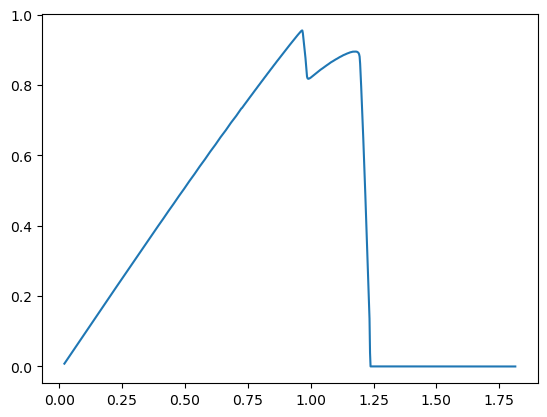

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9fcd0519c0>

In [30]:
plot(Displacement/0.1380000000000003,Load/11181.392568464598)

In [28]:
cd("../LoadDispData")

In [29]:
using DelimitedFiles
Disp = writedlm( "DispDataResults_e__+0.0015.csv",  Displacement, ',')
Force = writedlm("LoadDataResults_e__+0.0015.csv",  Load, ',')